# Regularization is a form of regression that regularizes or shrinks the coefficient estimates towards zero. Avoids the risk of overfitting.

In [1]:
# Lasso regularization is used in feature selection using shrinkage method.
# Lasso regression magnitude of coefs can be exactly zero.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
dataset = pd.read_csv('houseprices.csv')
dataset.head(3)

,Price,Living Area,Bathrooms,Bedrooms,Lot Size,Age,Fireplace
0,142212,1982,1.0,3,2.00,133,0
1,134865,1676,1.5,3,0.38,14,1
2,118007,1694,2.0,3,0.96,15,1


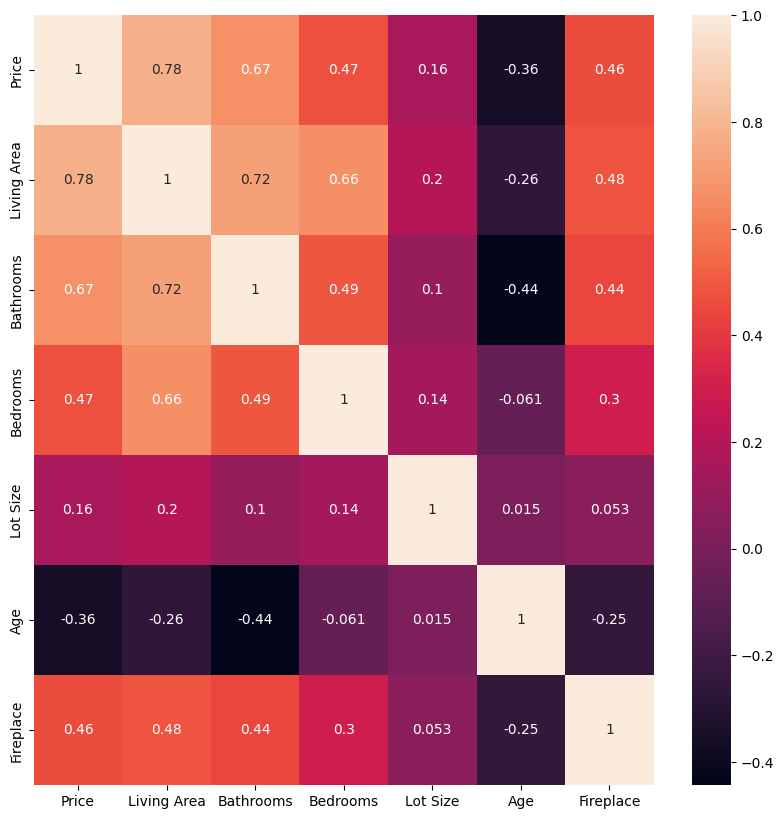

In [4]:
plt.figure(figsize = (10,10))
sns.heatmap(data = dataset.corr(),annot=True)
plt.show()

In [5]:
x= dataset.drop(columns = ['Price'])
y= dataset['Price']

In [6]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x), columns = x.columns)
x

,Living Area,Bathrooms,Bedrooms,Lot Size,Age,Fireplace
0,0.272473,-1.431707,-0.244539,1.839752,3.008204,-1.207372
1,-0.204791,-0.652197,-0.244539,-0.243830,-0.403080,0.828245
2,-0.176717,0.127313,-0.244539,0.502144,-0.374414,0.828245
3,-0.011390,-1.431707,-1.578038,-0.115214,0.600239,0.828245
4,0.437800,-1.431707,-0.244539,1.633966,0.026914,0.828245
...,...,...,...,...,...,...
1042,-0.008271,0.127313,1.088961,0.515005,0.800903,0.828245
1043,2.232999,2.465842,1.088961,2.482833,-0.775741,0.828245
1044,-0.572877,0.127313,-1.578038,0.051987,1.087565,0.828245
1045,0.347338,0.906822,-0.244539,0.553590,-0.718409,0.828245


In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [9]:
lr = LinearRegression()
lr.fit(x_train, y_train)


LinearRegression()

In [19]:
lr.score(x_test, y_test) * 100, lr.score(x_train, y_train)*100

(64.77745304733608, 64.54338257133048)

In [11]:
lr.coef_

array([41649.38704414, 12867.20689735, -4081.3206992 ,  2061.74464304,
       -6457.60188304,  4139.08067801])

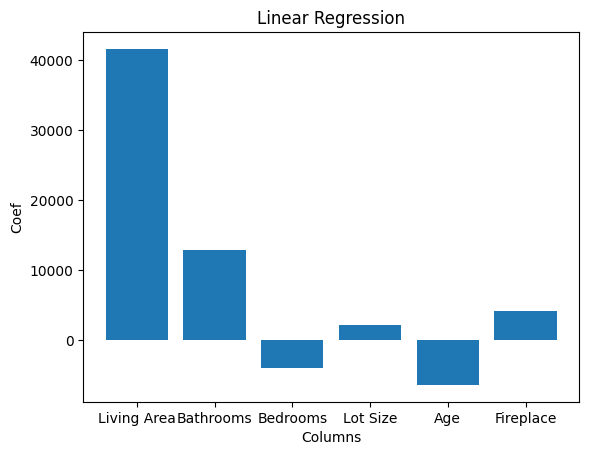

In [12]:
plt.bar(x.columns, lr.coef_)
plt.title('Linear Regression')
plt.xlabel('Columns')
plt.ylabel('Coef')
plt.show()

In [20]:
la = Lasso(alpha = 0.001)
la.fit(x_train, y_train)
la.score(x_test, y_test) * 100, la.score(x_train, y_train)*100

(64.77745311386785, 64.54338257133033)

In [18]:
la.coef_

array([41649.38506089, 12867.20637957, -4081.31779034,  2061.74356186,
       -6457.60160054,  4139.08010017])

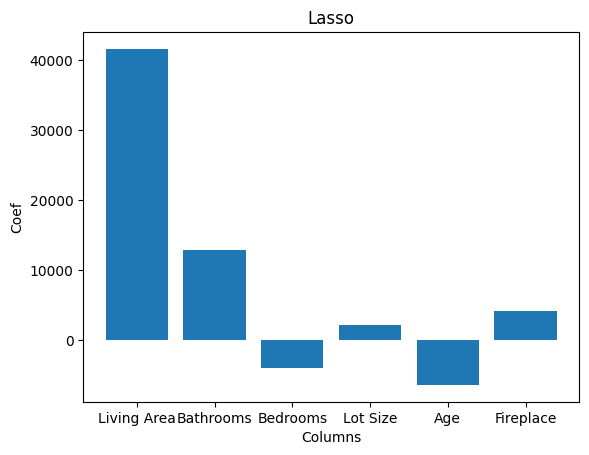

In [14]:
plt.bar(x.columns, la.coef_)
plt.title('Lasso')
plt.xlabel('Columns')
plt.ylabel('Coef')
plt.show()

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
print(mean_squared_error(y_test, lr.predict(x_test)))
print(mean_absolute_error(y_test, lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test, lr.predict(x_test))))  # root mse

1738203863.8878016
28710.764007435835
41691.772136571526


In [16]:
# for lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
print(mean_squared_error(y_test, la.predict(x_test)))
print(mean_absolute_error(y_test, la.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test, la.predict(x_test))))  # root mse

1738203860.6045132
28710.76377201226
41691.77209719579


In [17]:
df= pd.DataFrame({"col_name":x.columns, "LinearRegression":lr.coef_,"Lasso":la.coef_})
df # data from ridge also can be added and compared

,col_name,LinearRegression,Lasso
0,Living Area,41649.387044,41649.385061
1,Bathrooms,12867.206897,12867.206380
2,Bedrooms,-4081.320699,-4081.317790
3,Lot Size,2061.744643,2061.743562
4,Age,-6457.601883,-6457.601601
5,Fireplace,4139.080678,4139.080100
